In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

# Read the Sudoku image
image = cv2.imread('/home/snucse/Downloads/SET-4/image1083.jpg')


In [2]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)




In [3]:
# Apply Gaussian blur to smooth the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)



In [6]:

# Perform edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out the largest contour
sudoku_contour = max(contours, key=cv2.contourArea)

In [7]:
# Filter out the largest contour
sudoku_contour = max(contours, key=cv2.contourArea)


In [8]:
# Get the bounding rectangle of the contour
x, y, w, h = cv2.boundingRect(sudoku_contour)


In [9]:
# Crop the Sudoku grid region
sudoku_grid = gray[y:y+h, x:x+w]  # Convert to grayscale


In [10]:

# Apply preprocessing techniques (e.g., thresholding)
_, preprocessed = cv2.threshold(sudoku_grid, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)


(-0.5, 959.5, 1279.5, -0.5)

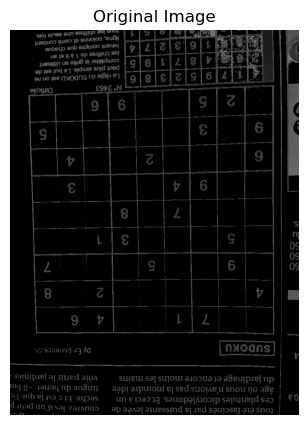

In [11]:

# Plot the obtained image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')




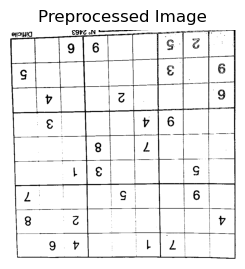

In [12]:
# Preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(preprocessed, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')

plt.show()
